In [1]:
# data comes from ECDC: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia


In [2]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]
# pivot
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-05-10,255.0,6.0,189.0,2.0,0.0,0.0,0.0,165.0,146.0,0.0,...,1.0,25612.0,8.0,51.0,14.0,0.0,0.0,0.0,85.0,1.0
2020-05-11,369.0,12.0,165.0,1.0,2.0,0.0,0.0,13.0,138.0,0.0,...,0.0,20258.0,5.0,31.0,12.0,0.0,0.0,17.0,15.0,0.0
2020-05-12,285.0,4.0,168.0,1.0,0.0,0.0,0.0,245.0,79.0,0.0,...,0.0,18117.0,4.0,91.0,8.0,0.0,0.0,5.0,0.0,1.0
2020-05-13,280.0,4.0,176.0,2.0,0.0,0.0,0.0,529.0,146.0,0.0,...,0.0,22048.0,6.0,38.0,1.0,0.0,0.0,11.0,174.0,0.0
2020-05-14,259.0,4.0,186.0,2.0,0.0,0.0,0.0,316.0,180.0,0.0,...,0.0,20782.0,2.0,65.0,17.0,0.0,0.0,3.0,5.0,0.0


In [3]:
# select only columns with totals greater than 10000
df2 = df[df.columns[df.sum()>10000]]
df2.sum().sort_values(ascending=False).head()

countriesAndTerritories
United_States_of_America    1390746.0
Russia                       242271.0
United_Kingdom               229705.0
Spain                        228691.0
Italy                        222104.0
dtype: float64

In [4]:
# reorder the columns
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories,United_States_of_America,Russia,United_Kingdom,Spain,Italy,Brazil,Germany,Turkey,France,Iran,...,Indonesia,Colombia,South_Africa,Philippines,Dominican_Republic,Kuwait,South_Korea,Denmark,Egypt,Serbia
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-05-10,25612.0,10817.0,3896.0,3416.0,1083.0,10611.0,667.0,1546.0,433.0,1529.0,...,533.0,444.0,525.0,147.0,506.0,415.0,34.0,101.0,488.0,89.0
2020-05-11,20258.0,11012.0,3923.0,393.0,802.0,6760.0,357.0,1542.0,209.0,1383.0,...,387.0,568.0,595.0,184.0,465.0,1065.0,35.0,110.0,436.0,82.0
2020-05-12,18117.0,11656.0,3877.0,482.0,744.0,5632.0,933.0,1114.0,456.0,1683.0,...,233.0,550.0,637.0,292.0,287.0,598.0,27.0,84.0,346.0,62.0
2020-05-13,22048.0,10899.0,3403.0,439.0,1402.0,9258.0,798.0,1704.0,708.0,1481.0,...,484.0,659.0,698.0,264.0,266.0,991.0,26.0,78.0,347.0,67.0
2020-05-14,20782.0,10028.0,3242.0,0.0,888.0,11385.0,933.0,1639.0,507.0,1958.0,...,689.0,658.0,724.0,268.0,296.0,751.0,29.0,76.0,338.0,52.0


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=28)
date_range = [first_date,last_date]

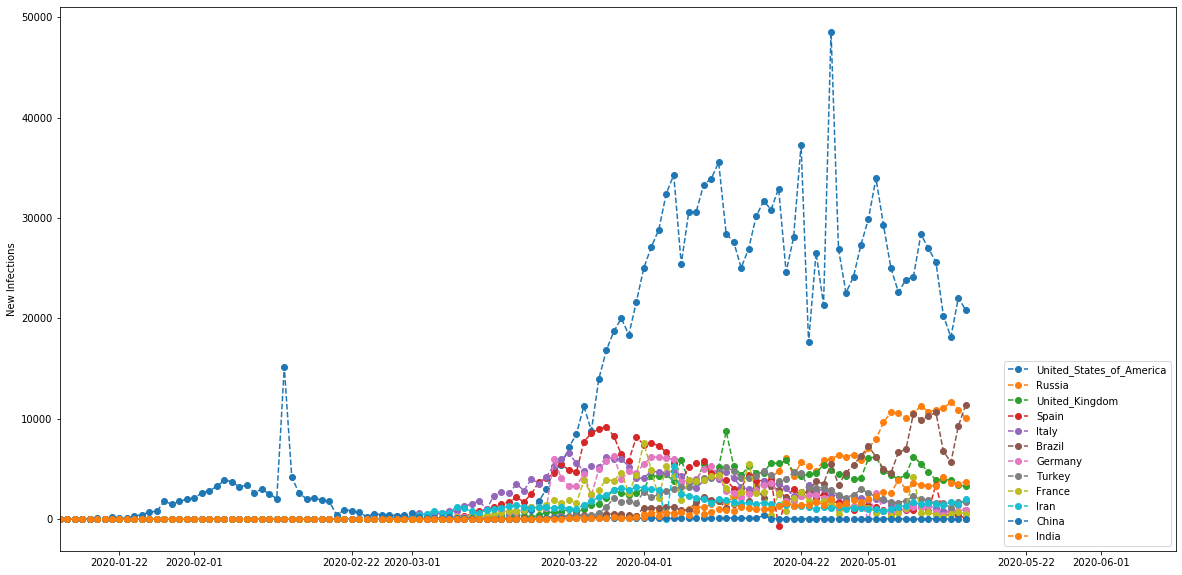

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:12],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

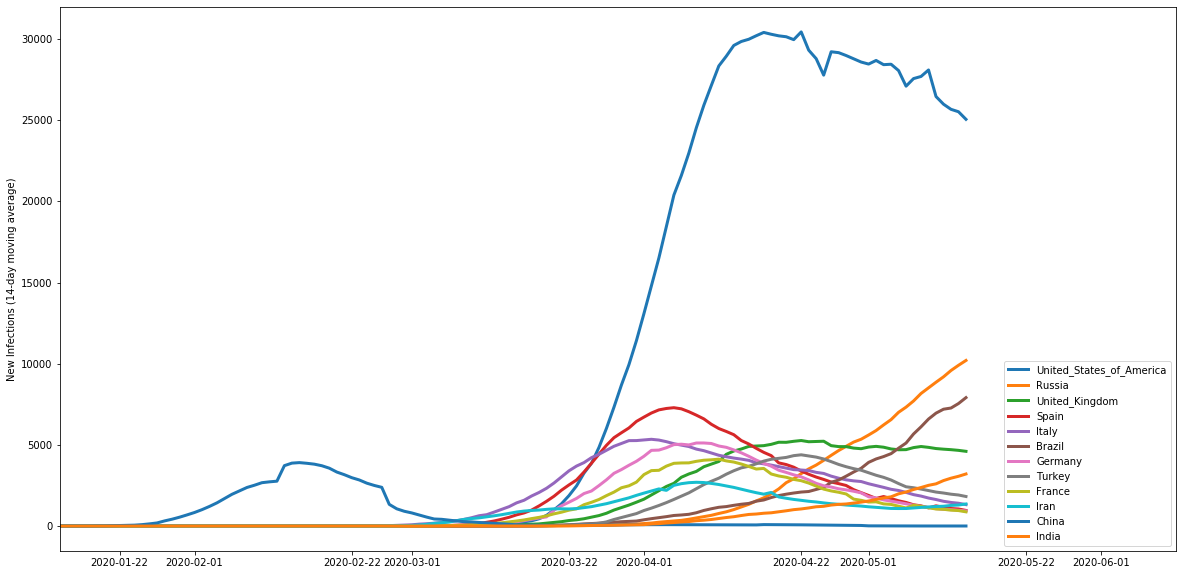

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:12].rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Infections (14-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

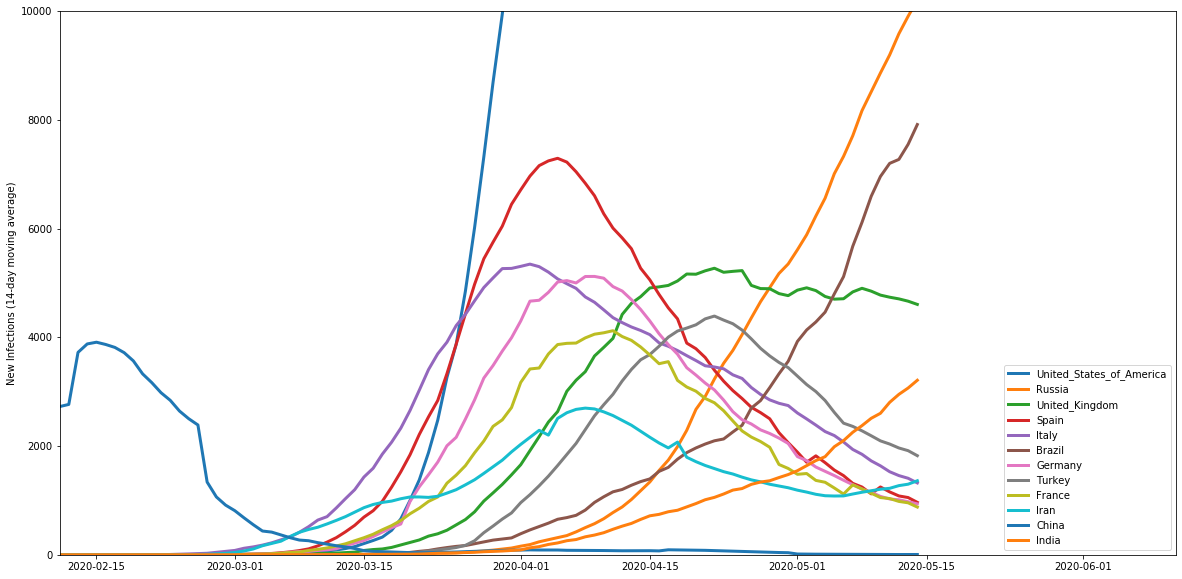

In [8]:
# zoom in the previous plot
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:12].rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Infections (14-day moving average)")
plt.xlim([first_date + dt.timedelta(days=28),last_date])
plt.ylim([0,10000])
plt.legend(df2.columns.values,loc=4);

In [9]:
# now let's look at the cummulative infection data
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories,United_States_of_America,Russia,United_Kingdom,Spain,Italy,Brazil,Germany,Turkey,France,Iran,...,Indonesia,Colombia,South_Africa,Philippines,Dominican_Republic,Kuwait,South_Korea,Denmark,Egypt,Serbia
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-05-10,1309541.0,198676.0,215260.0,227377.0,218268.0,155939.0,169218.0,137115.0,138854.0,106220.0,...,13645.0,10495.0,9420.0,10610.0,9882.0,7623.0,10874.0,10319.0,8964.0,10032.0
2020-05-11,1329799.0,209688.0,219183.0,227770.0,219070.0,162699.0,169575.0,138657.0,139063.0,107603.0,...,14032.0,11063.0,10015.0,10794.0,10347.0,8688.0,10909.0,10429.0,9400.0,10114.0
2020-05-12,1347916.0,221344.0,223060.0,228252.0,219814.0,168331.0,170508.0,139771.0,139519.0,109286.0,...,14265.0,11613.0,10652.0,11086.0,10634.0,9286.0,10936.0,10513.0,9746.0,10176.0
2020-05-13,1369964.0,232243.0,226463.0,228691.0,221216.0,177589.0,171306.0,141475.0,140227.0,110767.0,...,14749.0,12272.0,11350.0,11350.0,10900.0,10277.0,10962.0,10591.0,10093.0,10243.0
2020-05-14,1390746.0,242271.0,229705.0,228691.0,222104.0,188974.0,172239.0,143114.0,140734.0,112725.0,...,15438.0,12930.0,12074.0,11618.0,11196.0,11028.0,10991.0,10667.0,10431.0,10295.0


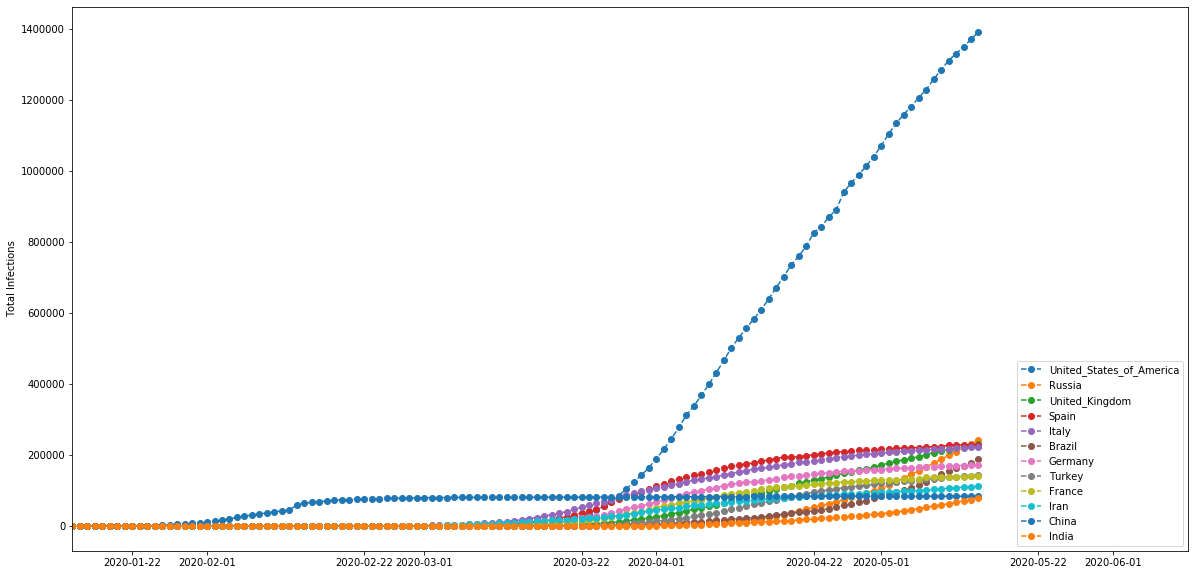

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

(0, 250000)

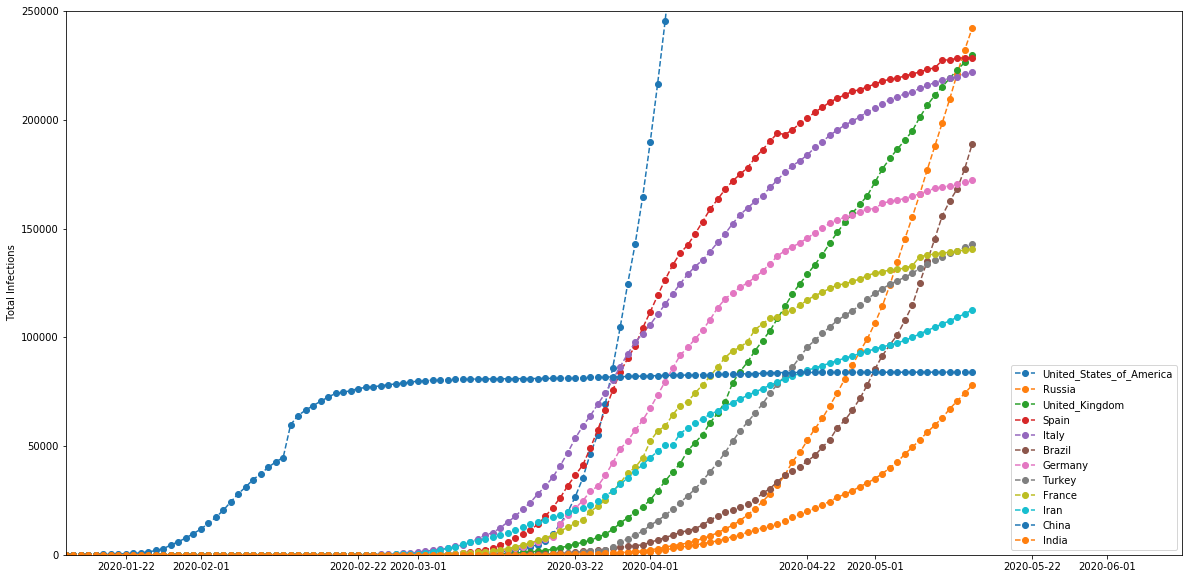

In [11]:
# zoom in the y-axis
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4)
plt.ylim([0,250000])

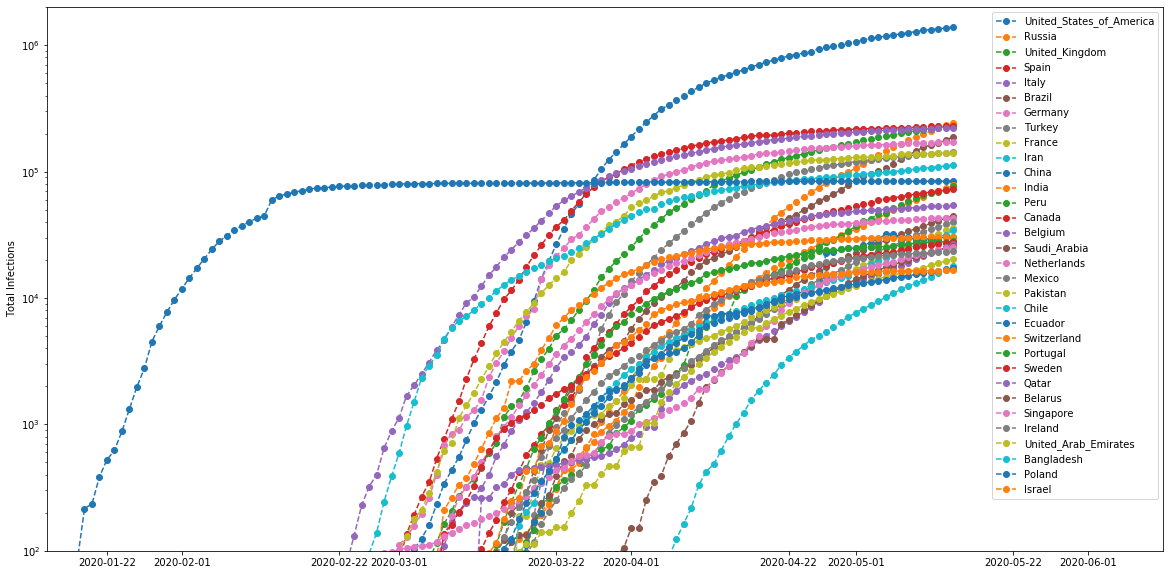

In [12]:
# plot on a logarithmic scale
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,2000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

In [13]:
# now look at the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>100]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories,United_States_of_America,United_Kingdom,Italy,Spain,France,Brazil,Belgium,Germany,Iran,Netherlands,...,Bolivia,Cameroon,Afghanistan,Honduras,Bosnia_and_Herzegovina,Puerto_Rico,Iraq,Malaysia,Slovenia,Luxembourg
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-05-08,2239.0,539.0,274.0,181.0,178.0,610.0,76.0,147.0,68.0,84.0,...,11.0,0.0,2.0,6.0,4.0,3.0,0.0,0.0,0.0,2.0
2020-05-09,1510.0,626.0,243.0,227.0,243.0,751.0,106.0,103.0,55.0,71.0,...,4.0,0.0,3.0,2.0,8.0,5.0,2.0,0.0,1.0,0.0
2020-05-10,1614.0,346.0,194.0,143.0,80.0,730.0,60.0,26.0,48.0,63.0,...,8.0,0.0,6.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0
2020-05-11,734.0,268.0,165.0,123.0,70.0,496.0,75.0,22.0,51.0,18.0,...,4.0,6.0,5.0,0.0,4.0,3.0,2.0,0.0,1.0,0.0
2020-05-12,1156.0,210.0,179.0,176.0,263.0,396.0,51.0,116.0,45.0,16.0,...,4.0,11.0,2.0,8.0,10.0,2.0,1.0,1.0,0.0,0.0
2020-05-13,1703.0,627.0,172.0,184.0,348.0,881.0,54.0,101.0,48.0,54.0,...,6.0,0.0,5.0,5.0,5.0,1.0,2.0,0.0,0.0,1.0
2020-05-14,1746.0,494.0,195.0,0.0,83.0,749.0,82.0,89.0,50.0,52.0,...,14.0,11.0,3.0,2.0,3.0,1.0,3.0,2.0,1.0,1.0


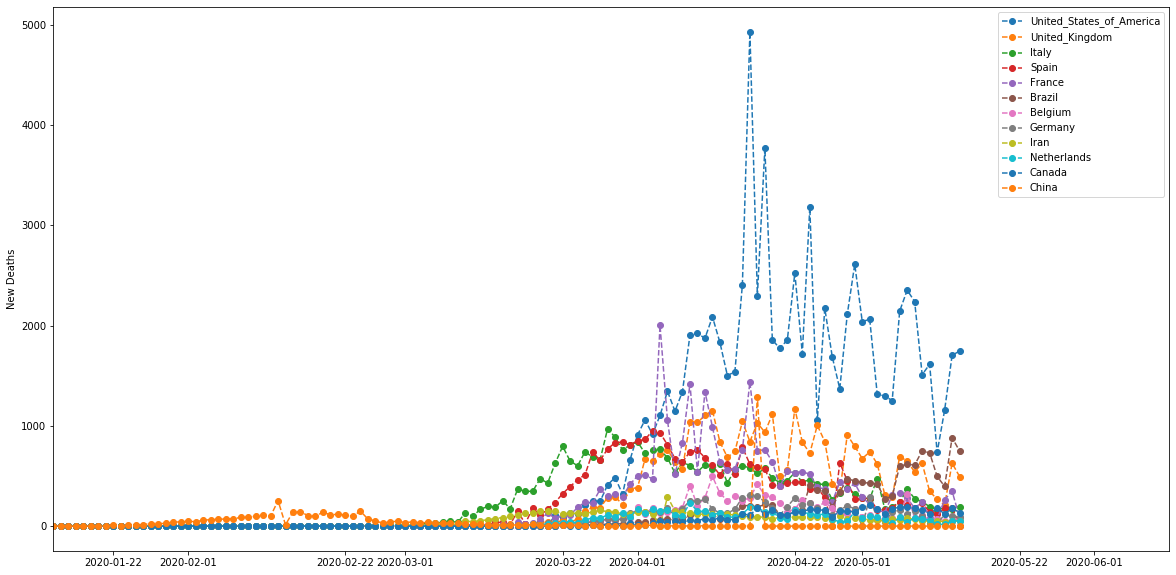

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

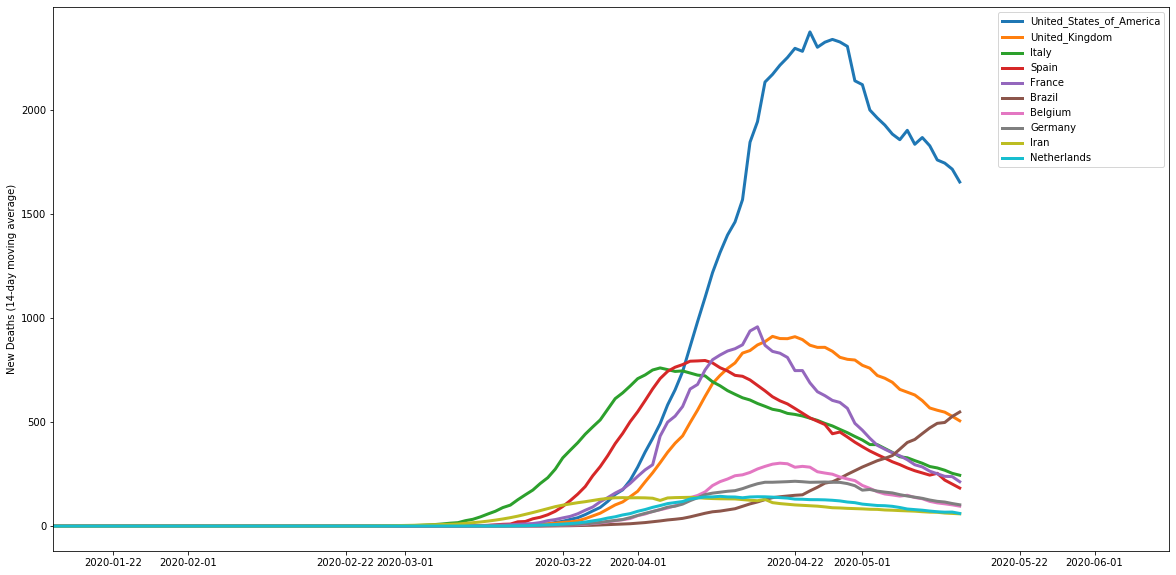

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:10].rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Deaths (14-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

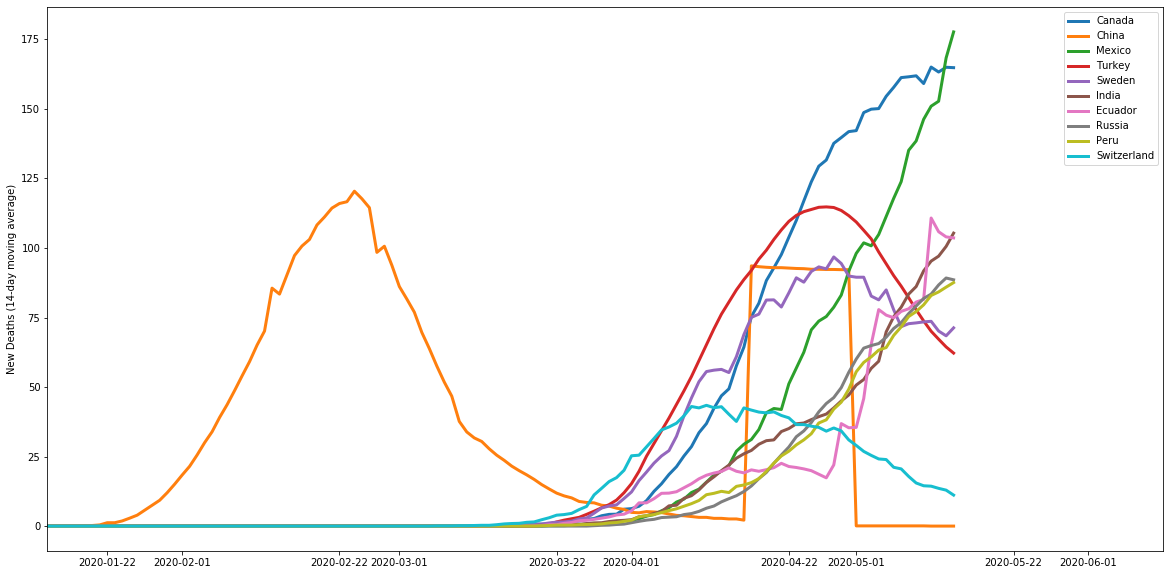

In [16]:
#plot the next 10 countries
df_deaths_selected = df_deaths.iloc[:,10:20]
plt.figure(figsize=(20,10))
plt.plot(df_deaths_selected.rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Deaths (14-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths_selected.columns.values,loc=1);

In [17]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories,United_States_of_America,United_Kingdom,Italy,Spain,France,Brazil,Belgium,Germany,Iran,Netherlands,...,Bolivia,Cameroon,Afghanistan,Honduras,Bosnia_and_Herzegovina,Puerto_Rico,Iraq,Malaysia,Slovenia,Luxembourg
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-05-10,78794.0,31587.0,30395.0,26621.0,26310.0,10627.0,8581.0,7395.0,6589.0,5422.0,...,114.0,108.0,115.0,108.0,98.0,108.0,107.0,108.0,101.0,101.0
2020-05-11,79528.0,31855.0,30560.0,26744.0,26380.0,11123.0,8656.0,7417.0,6640.0,5440.0,...,118.0,114.0,120.0,108.0,102.0,111.0,109.0,108.0,102.0,101.0
2020-05-12,80684.0,32065.0,30739.0,26920.0,26643.0,11519.0,8707.0,7533.0,6685.0,5456.0,...,122.0,125.0,122.0,116.0,112.0,113.0,110.0,109.0,102.0,101.0
2020-05-13,82387.0,32692.0,30911.0,27104.0,26991.0,12400.0,8761.0,7634.0,6733.0,5510.0,...,128.0,125.0,127.0,121.0,117.0,114.0,112.0,109.0,102.0,102.0
2020-05-14,84133.0,33186.0,31106.0,27104.0,27074.0,13149.0,8843.0,7723.0,6783.0,5562.0,...,142.0,136.0,130.0,123.0,120.0,115.0,115.0,111.0,103.0,103.0


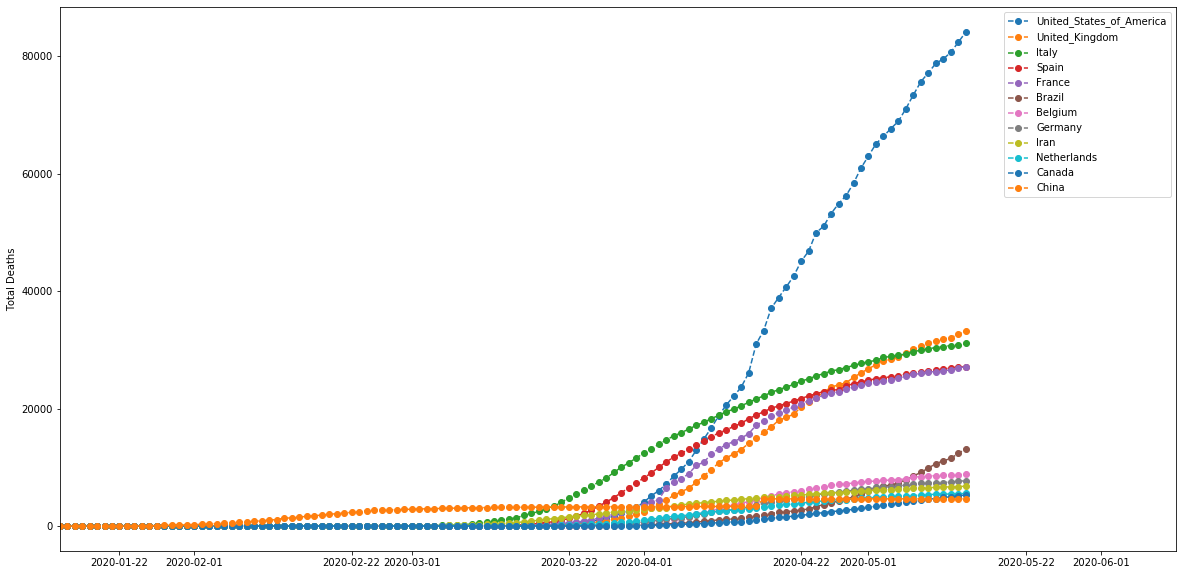

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

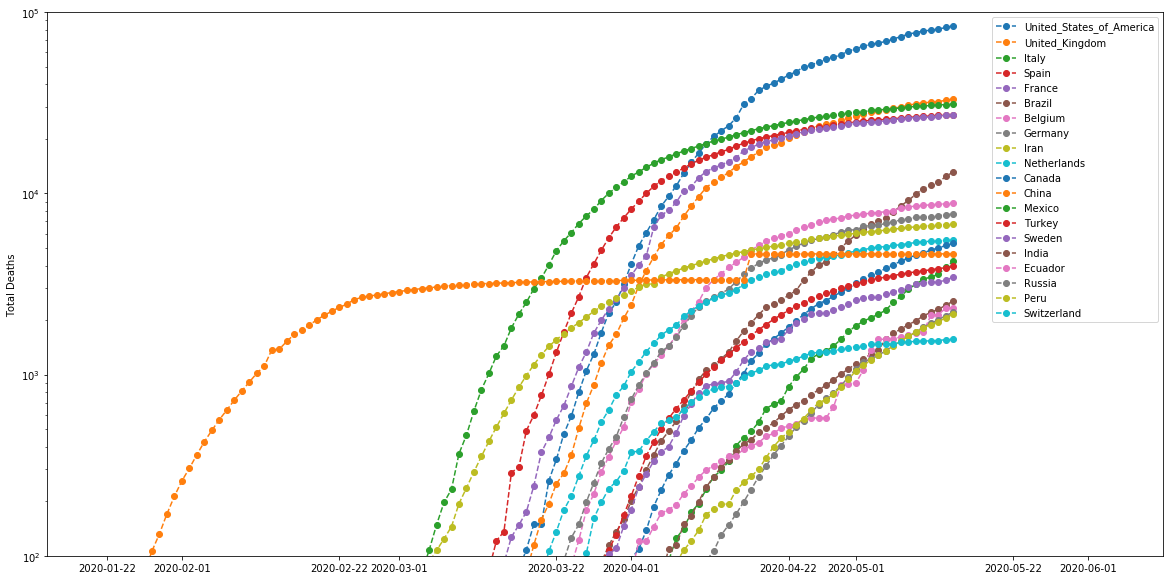

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:20],'o--')
plt.yscale('log')
plt.ylim([100,100000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

In [20]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [21]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

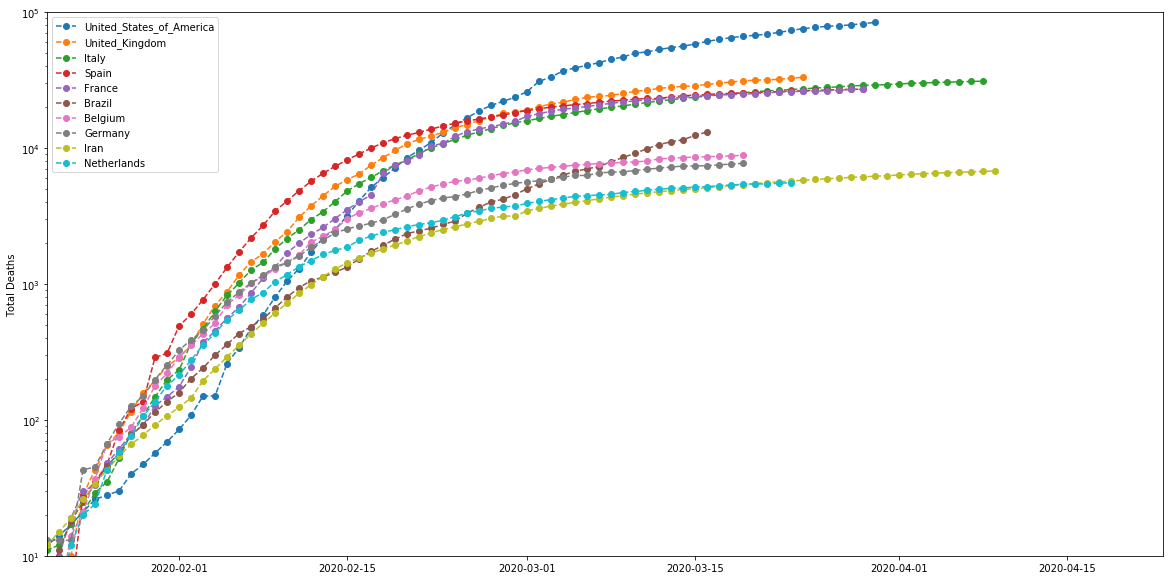

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([10,100000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=90)])
plt.legend(df_deaths_cum.columns.values, loc=0);

In [23]:
# now let's have a look at the data for Italy to see if we can predict it going forward

import numpy as np
italy = df_deaths_cum['Italy']
italy = italy[italy > 20]
xdata = np.array(range(len(italy)))
ydata = np.array(italy,dtype=np.float128)

In [24]:
#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(1 + b*np.exp(-c*(x+d)),1/e)
     #y = a / np.power(np.abs(1 + b*np.exp(-c*(x+d))),1/e)
     return y

# TODO: it might also be worth trying the even more general version of the equation: 
def generalised_logistic_2(x, a, b, c, d, e, f, g):
     y = a / np.power(f + b * np.exp( -c * (x + d) ),1/e) + g
     return y

In [25]:
# now let's fit the curve
from scipy.optimize import curve_fit

# reduce the importance of older data by an exponential decay factor:
decay = .95
# TODO: this value should be set empirically to minimise the forecast errors up to the current time 

# restrict the range of parameter values with upper and lower bounds
bounds =([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

# initial parameter settings (these were set after a bit of playing around with the data)
p0=[2*ydata.max(), 10, .1, 0.0, 1.0]

# estimate the model:
popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=False, bounds=bounds, p0=p0, maxfev=10000)

# print the parameters along with their error estimates
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
print("parameter estimates: ", popt)
print("standard error:      ", np.sqrt(np.diag(pcov)))

parameter estimates:  [34336.38351483     0.00044126     0.0547436      0.01357168     0.00007312]
standard error:       [160.22772183   0.08522101   0.00153929   5.09679606   0.01411748]


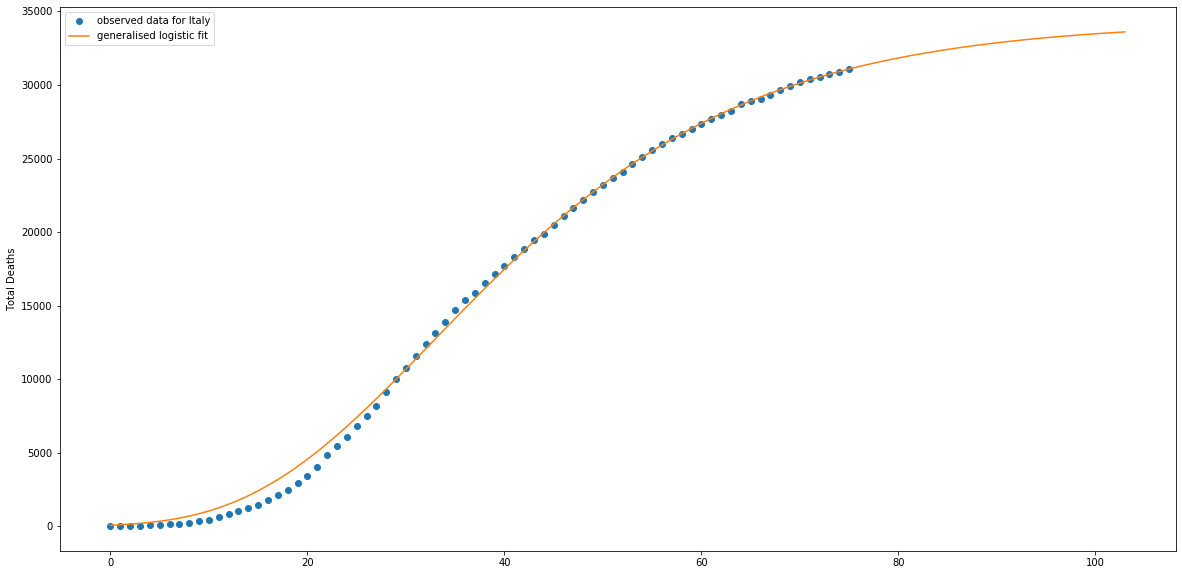

In [26]:
# plot the predictions

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = range(len(ydata)+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

In [27]:
# calculate the RMSE for the fit
error = ydata - generalised_logistic(xdata, *popt)
sse = np.power(error,2).sum()
mse = sse/len(error)
rmse = np.sqrt(mse)
rmse

451.22782662579264315

In [28]:
# calculate confidence bands using the delta-method:

# 1) use sympy to find gradient of function
from sympy import symbols,exp,lambdify

x, a, b, c, d, e = symbols('x a b c d e')
y = a / (1 + b*exp(-c*(x+d)))**(1/e)
dy_da = lambdify([x,[a,b,c,d,e]],y.diff(a))
dy_db = lambdify([x,[a,b,c,d,e]],y.diff(b))
dy_dc = lambdify([x,[a,b,c,d,e]],y.diff(c))
dy_dd = lambdify([x,[a,b,c,d,e]],y.diff(d))
dy_de = lambdify([x,[a,b,c,d,e]],y.diff(e))

def gradient(x, params):
    return [dy_da(x,params),dy_db(x,params),dy_dc(x,params),dy_dd(x,params),dy_de(x,params)] 

# 2) multiply gradient by covariance to compute variance of prediction \hat{y}
def variance_in_y_hat(x, params, cov):
    g = np.array(gradient(x,params)) 
    return g.dot(cov).dot(g)

# 3) scale by estimated standard deviation by critical value 1.96 to get 95% confidence interval
c = 1.96
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov)) for x in xpred]

# 4) finally, for a prediction interval, we need also to take into account the variance in y itself, (not just in \hat{y}), so add mse
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov) + mse) for x in xpred]

# TODO: improve these prediction bands: 
# (1) use the 95% critical value from t-distribution rather than gaussian (with  degree of freedom df=n-5), and sse/df instead of mse
# (2) check whether bounds need to increase with # steps into future
# (3) compare with bootstrap based estimates for the bounds

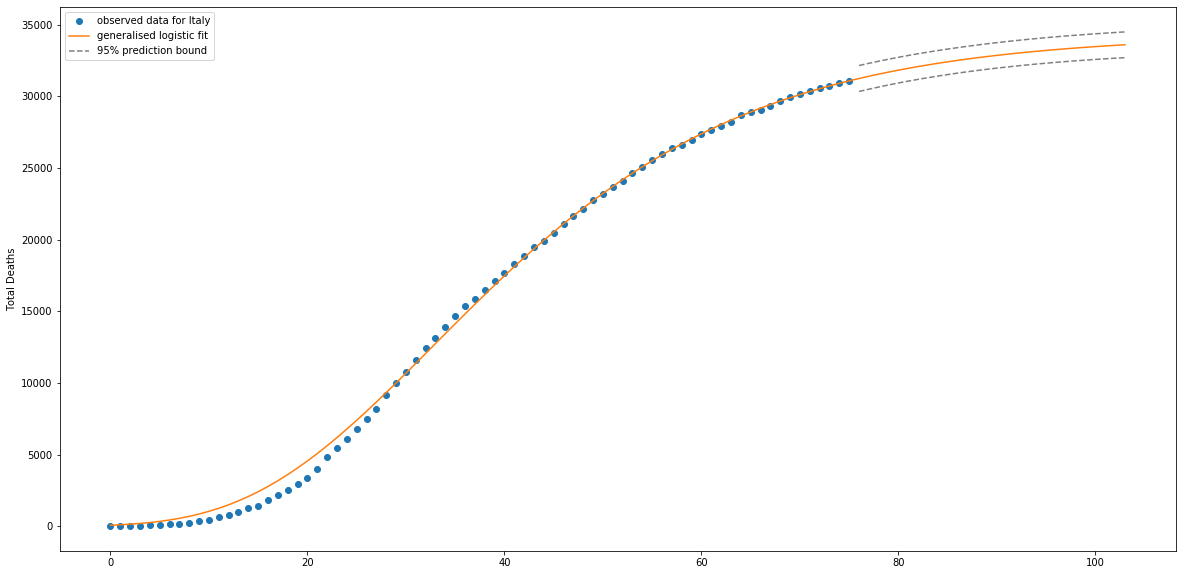

In [29]:
# plot the predictions with the prediction intervals
# NB: the interval GREATLY UNDERESTIMATES UNCERTAINTY 
# (since it assumes that the model is correct, which is almost certainly isn't)

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
n = len(ydata)
xpred = range(n+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.plot(xpred[n:], ypred[n:]+intervals[n:], '--', color='grey', label='95% prediction bound')
plt.plot(xpred[n:], ypred[n:]-intervals[n:], '--', color='grey')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


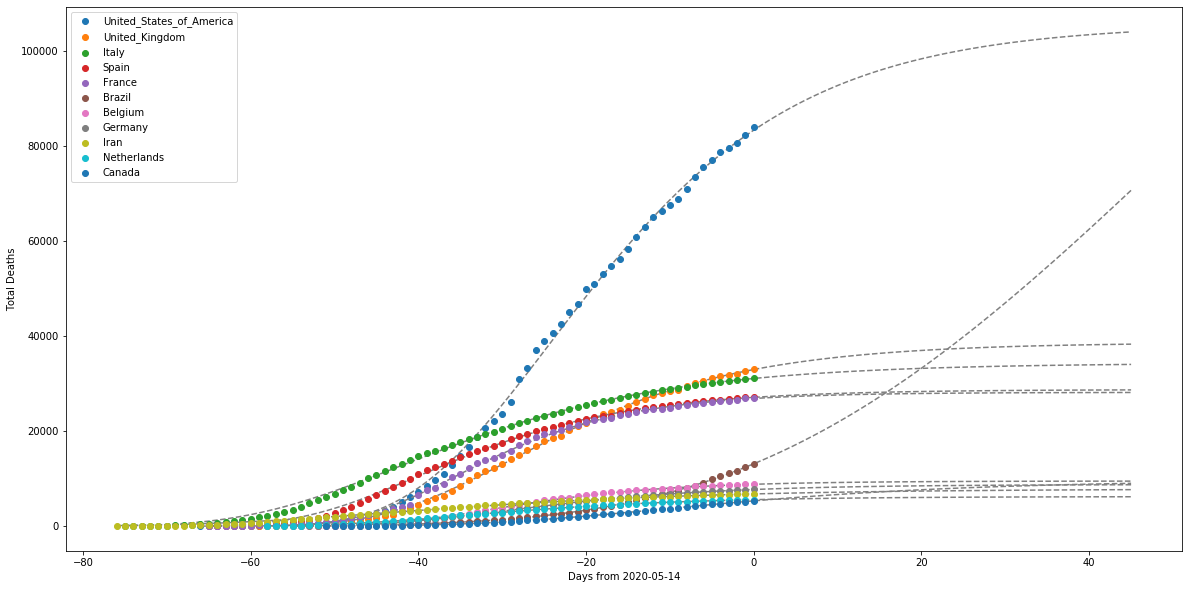

In [30]:
# plot other countries with high fatality counts

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:12]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


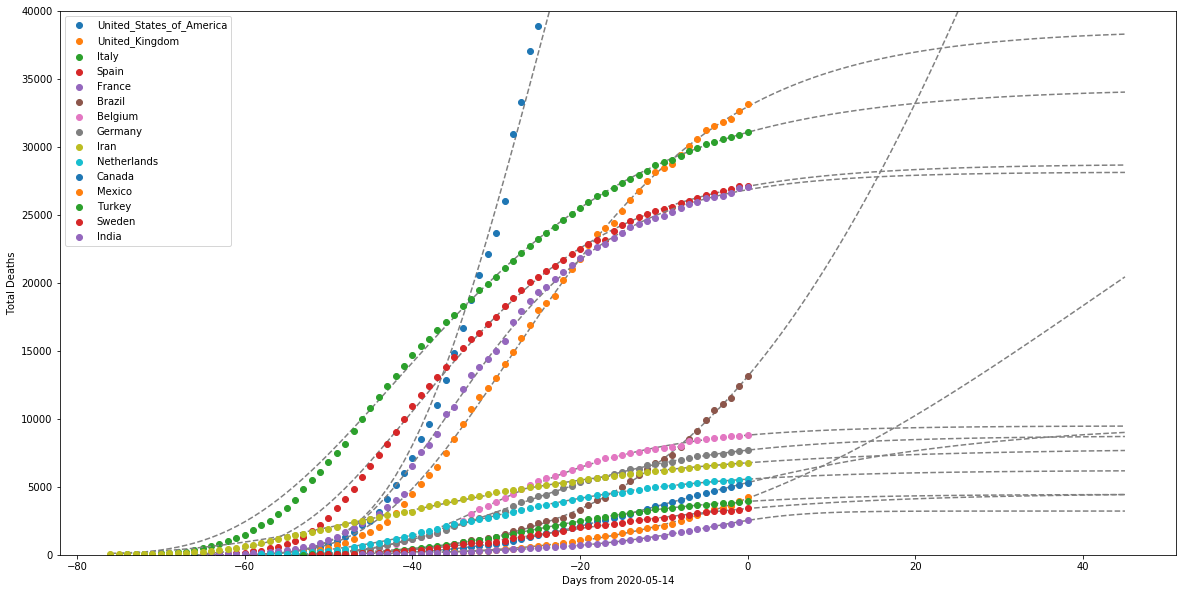

In [31]:
# zoom in the y-axis on the previous plot

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:16]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.ylim([0,40000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

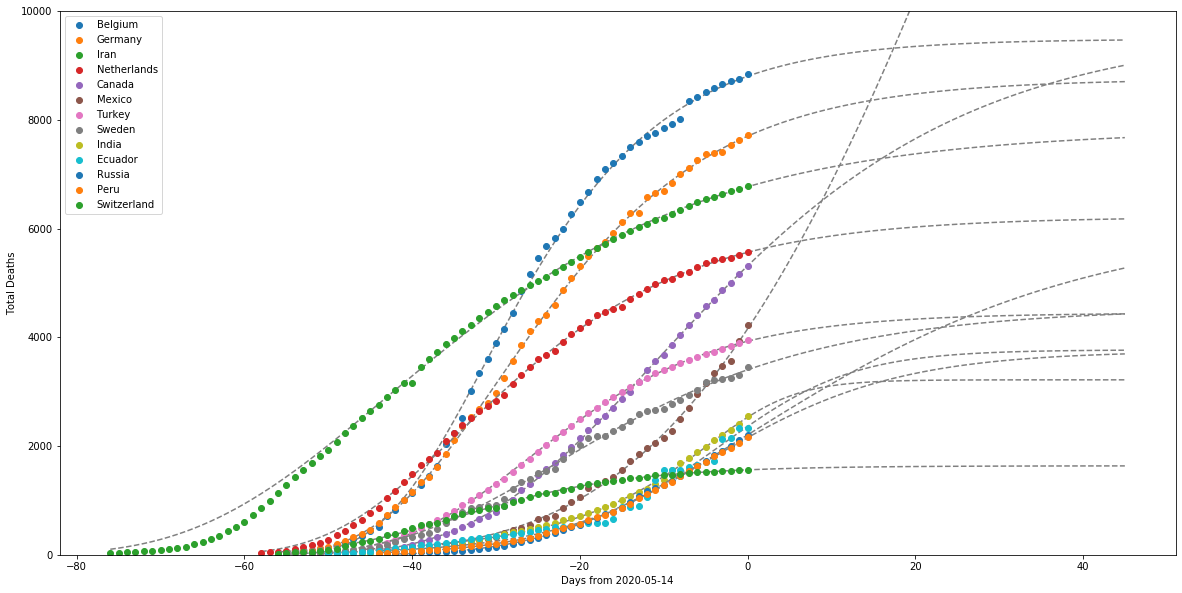

In [32]:
# remove top 6 to zoom in further the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,6:20]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.ylim([0,10000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


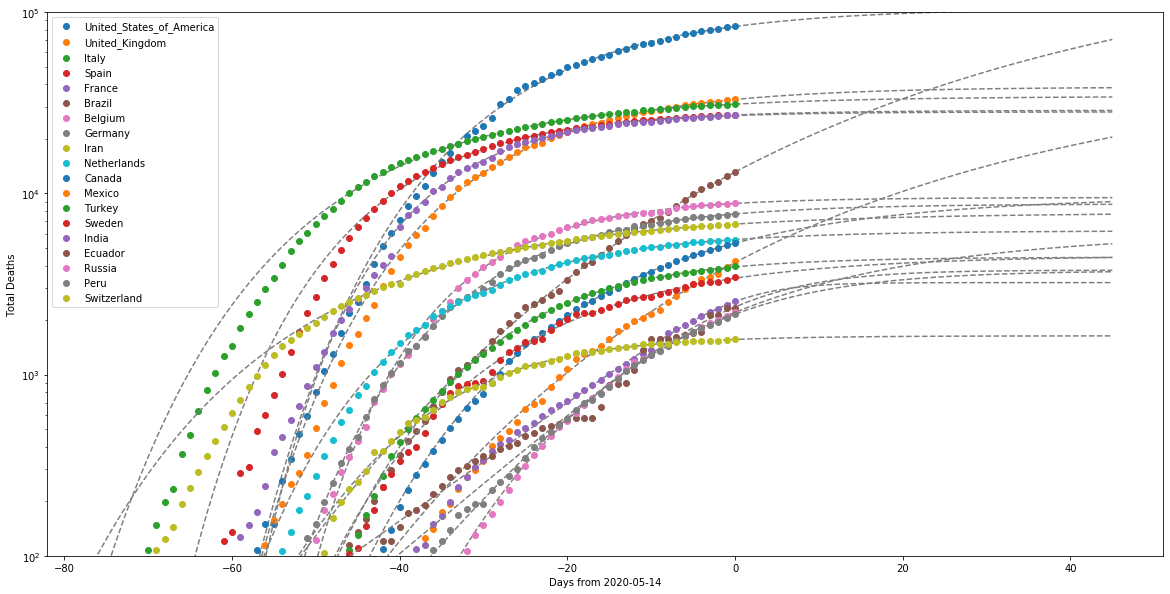

In [33]:
# log scale on the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:20]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.ylim([100,100000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


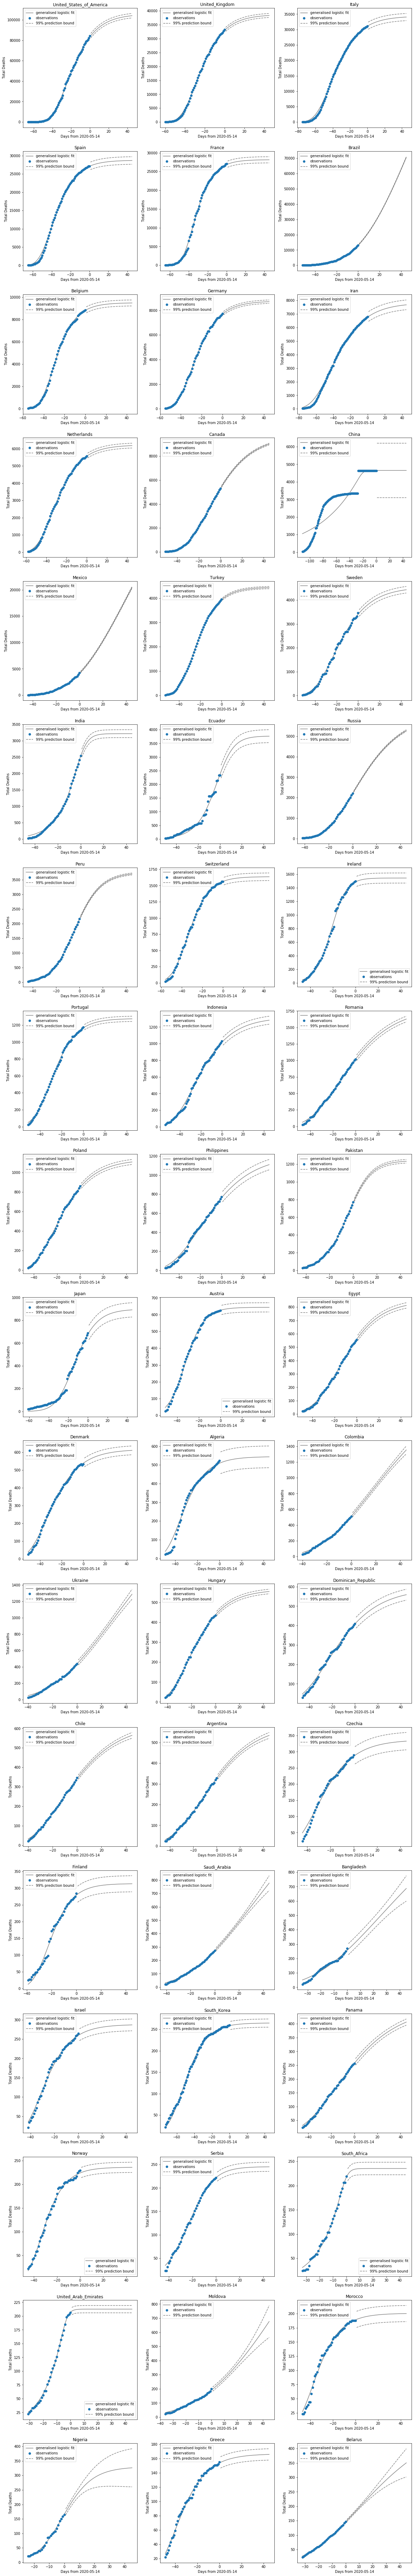

In [34]:
# plot each country's prediction with error bounds

plt.figure(figsize=(20,150))

c = 2.576; # use simple 99% bounds

count = 0
for col in df_deaths_cum.iloc[:,:54]:
    
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    
    # copute predictions
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    
    # compute prediction interval
    error = ydata - generalised_logistic(xdata, *popt)
    mse = np.power(error,2).sum()/len(error)
    intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov) + mse) for x in xpred]
    
    count = count + 1
    plt.subplot(20,3,count)
    
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '-', color='grey', label='generalised logistic fit')
    plt.plot(xdata+offset, ydata, 'o', label='observations')
    
    n = len(ydata)
    plt.plot(xpred[n:]+offset, ypred[n:]+intervals[n:], '--', color='grey', label='99% prediction bound')
    plt.plot(xpred[n:]+offset, ypred[n:]-intervals[n:], '--', color='grey')
    
    plt.title(col)
    plt.ylabel("Total Deaths")
    plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
    plt.legend(loc=0);
    